# Wordcloud #

In [105]:
import numpy as np, pandas as pd, seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk, nltk.sentiment, sklearn
import collections
from collections import Counter
import PyPDF2
import requests

import os

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

In [38]:
url = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/bow_ny.csv'

neu_df = pd.read_csv(url, delimiter = ';')
neu_words = set(neu_df['Word'])
len(neu_words)

1093

In [52]:
#Preprocessing - tokenize and lower case pdf-strings

tokenizer = nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    string = string.lower()
    string = tokenizer.tokenize(string)
    return string

#Apply positive/negative sets on pdf-string

def count_dictionary(document_elem, dictionary):
    lst = []
    for word in document_elem:
        if (word in dictionary):
            lst.append(word)
    return [lst]

#PDF extractor script. Creates a list separated per page.

def pdf_extractor(path):
    pdf_file = open(path, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    res1 = []
    for i in range(len(c)):
        page = read_pdf.getPage(i)
        page_content = page.extractText()
        res1.append(page_content)
    return res1


In [53]:
basedir = 'https://github.com/MatPiq/SDS-Group-35/tree/master/Exam_Project/Minutes_PDF'
testdir = r'C:\Users\sebag\Documents\GitHub\Exam\Test folder'

def neu_count(neu, file_path):
    neu_words = []
    i = 0
    error = []
    
    for fn in os.listdir(file_path):
        try:
            print('Now treating file: ' + fn + '\nDocument no.: ' + str(i+1))
            doc = pdf_extractor(file_path + ('/' if file_path[:3] == 'http' else '\\') + fn)
            doc = pd.Series([''.join(doc)])
            doc = doc.apply(preprocessing)

            neu_words.append(count_dictionary(doc[0], neu))
            error.append(False)

            i += 1

            #date = re.findall(r'\d+', fn)
        except KeyError:
            neu_words.append(np.NaN)
            error.append(True)
            i += 1
        
    df = pd.DataFrame(neu_words)
    return df

wordc_df = neu_count(neu_words, testdir)

Now treating file: ppp000001e.pdf
Document no.: 1
Now treating file: ppp000002e.pdf
Document no.: 2
Now treating file: ppp000003e.pdf
Document no.: 3
Now treating file: ppp181219e.pdf
Document no.: 4


In [112]:
wordc_dic = Counter([])
for elem in wordc_df[0]:
    a = Counter(elem)
    wordc_dic = wordc_dic + a

wordc_dic = dict(sorted(wordc_dic.items(), key = lambda x: x[1], reverse = True))

n = 75

wordc_lst = list(wordc_dic.items())
del wordc_lst[n:]
wordc_dic = dict(wordc_lst)

print(wordc_dic)

{'growth': 86, 'increase': 70, 'strong': 51, 'higher': 50, 'prospects': 40, 'rising': 39, 'support': 37, 'increases': 34, 'lower': 33, 'rise': 30, 'stronger': 29, 'increased': 28, 'pressure': 23, 'expansionary': 22, 'foreseen': 21, 'development': 21, 'upward': 18, 'close': 18, 'weak': 17, 'uncertainty': 17, 'underlying': 16, 'remain': 16, 'risk': 16, 'lead': 15, 'forward': 15, 'fall': 14, 'unemployment': 12, 'greater': 12, 'light': 12, 'contributed': 11, 'fallen': 11, 'connection': 10, 'question': 10, 'subdued': 9, 'despite': 9, 'strength': 9, 'rapidly': 9, 'growing': 8, 'risen': 8, 'falling': 7, 'uncertain': 7, 'downwards': 7, 'larger': 6, 'tightening': 6, 'appreciation': 6, 'addition': 6, 'consequence': 6, 'declined': 6, 'movements': 6, 'supported': 6, 'exceed': 6, 'stability': 6, 'favour': 6, 'upturn': 6, 'balanced': 5, 'smaller': 5, 'slower': 5, 'contribute': 5, 'great': 5, 'pressures': 5, 'rose': 4, 'restrictive': 4, 'restrictions': 4, 'hold': 4, 'competition': 4, 'generate': 4, '

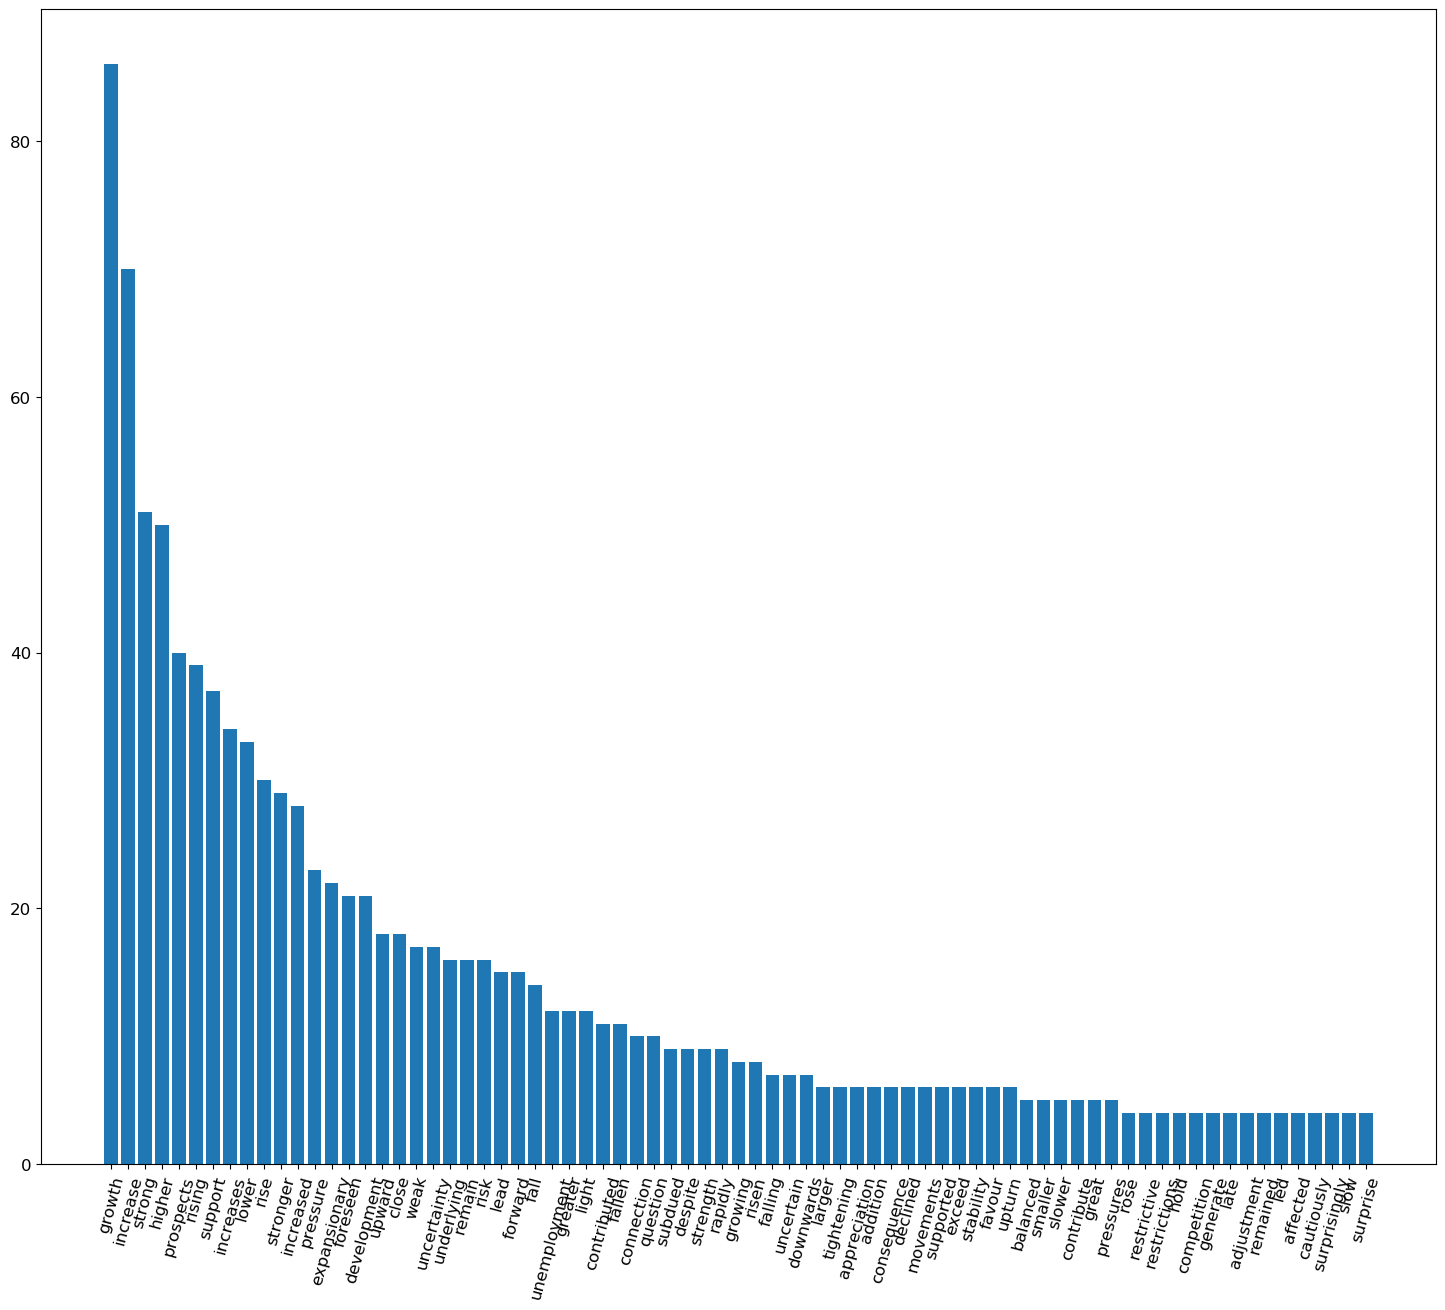

In [116]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
plt.rcParams['lines.markersize'] = 4
plt.figure(figsize=(18, 15))

plt.bar(range(len(wordc_dic)), list(wordc_dic.values()), align='center')
plt.xticks(range(len(wordc_dic)), list(wordc_dic.keys()), rotation = 75)

plt.show()

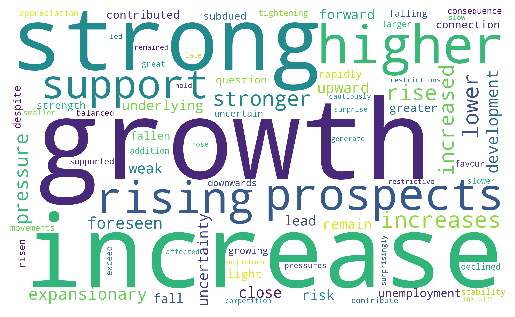

In [124]:
wc = WordCloud(background_color="white",width=2000,height=1200,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordc_dic)

plt.axis("off")
plt.figure
plt.imshow(wc)